<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/80_C_DOE_DBCA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diseño de Experimentos 2023**
## **TEMA 1: Diseños completamente aleatorizados DBCA**
### **DBCA - De la Vara Ejemplo 12**
+ Se diseñó un experimento para estudiar el rendimiento de cuatro detergentes. Las siguientes lecturas de “blancura” se obtuvieron con un equipo especial diseñado para 12 cargas de lavado, distribuidas en tres modelos de lavadoras:


|Detergente| Lavadora 1| Lavadora 2| Lavadora 3|
|:--:|:--:|:--:|:--:|
|A|45|43|51|
|B|47|44|52|
|C|50|49|57|
|D|42|37|49|


+ Preguntas:
  - a) Señale el nombre del diseño experimental utilizado
  - b) Formule la hipótesis que se quiere probar en este problema.
  - c) Realice el análisis estadístico más apropiado para estos datos y obten ga conclusiones.
  - d) Conteste los tres incisos del problema anterior sin tomar en cuenta el efecto de las lavadoras y obtenga conclusiones.
  - e) ¿Hay diferencias en las conclusiones anteriores y las del pro blema anterior? Explique su respuesta.
  - f) ¿Con cuáles conclusiones se queda? Explique su respuesta.

## ***a. Librerías***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
import scipy.stats as stats


# **b. Hipotesis - DBCA**

- **Las hipótesis a probar: Para los tratamientos**
$$H_{01}: \mu_{A}=\mu_{B}=\mu_{C}=\mu_{D}$$

$$Vs$$ $$H_{a1}: \mu_{i}\neq\mu_{j}$$ _Al menos un par de detergentes tienen rendimientos medios diferentes_

- **Las hipótesis a probar: Para los Bloques**
$$H_{02}: \mu_{L_1}=\mu_{L_2}=\mu_{L_3}$$

$$Vs$$ $$H_{a2}: \mu_{L_i}\neq\mu_{L_j}$$  

_Al menos un par de Lavadoras tienen rendimientos medios diferentes_


|Detergente| Lavadora 1| Lavadora 2| Lavadora 3|
|:--:|:--:|:--:|:--:|
|A|45|43|51|
|B|47|44|52|
|C|50|49|57|
|D|42|37|49|

# **2.2 El DataFrame de los datos**

In [ ]:
# **2.2 El DataFrame de los datos**
Detergente = (['A']*3+['B']*3+['C']*3+['D']*3)*1

In [ ]:
Lavadora = (['L1']*1+['L2']*1+['L3']*1)*4

In [ ]:
Rendimiento = [45, 43, 51, 47, 44, 52, 50, 49, 57, 42, 37,49]

In [ ]:
dic_DBCA ={'Lavadora': Lavadora, 'Detergente': Detergente,'Rendimiento':Rendimiento}

In [ ]:
DBCA  = pd.DataFrame(dic_DBCA)
DBCA

,Lavadora,Detergente,Rendimiento
0,L1,A,45
1,L2,A,43
2,L3,A,51
3,L1,B,47
4,L2,B,44
5,L3,B,52
6,L1,C,50
7,L2,C,49
8,L3,C,57
9,L1,D,42


# **2.3. Analisis descriptivo de la variable**

In [ ]:
# **2.3. Analisis descriptivo de la variable**
DBCA.describe()


,Rendimiento
count,12.000000
mean,47.166667
std,5.322906
min,37.000000
25%,43.750000
50%,48.000000
75%,50.250000
max,57.000000


# **2.4 Acediendo a algunos atributos del DataFrame**

In [ ]:
# **a Acediendo al atributo columns**
DBCA.columns

Index(['Lavadora', 'Detergente', 'Rendimiento'], dtype='object')

In [ ]:
# **b Accediendo al atributo tipo de datos de cada columna**
DBCA.dtypes

Lavadora       object
Detergente     object
Rendimiento     int64
dtype: object

In [ ]:
#**c. Contar las observaciones**
DBCA["Lavadora"].value_counts()

L1    4
L2    4
L3    4
Name: Lavadora, dtype: int64

In [ ]:
#**d. Contar las observaciones**
DBCA["Detergente"].value_counts()

A    3
B    3
C    3
D    3
Name: Detergente, dtype: int64

In [ ]:
#**e. Contar las observaciones**
DBCA["Rendimiento"].value_counts()

49    2
45    1
43    1
51    1
47    1
44    1
52    1
50    1
57    1
42    1
37    1
Name: Rendimiento, dtype: int64

In [ ]:
DBCA[["Rendimiento","Lavadora"]].T

,0,1,2,3,4,5,6,7,8,9,10,11
Rendimiento,45,43,51,47,44,52,50,49,57,42,37,49
Lavadora,L1,L2,L3,L1,L2,L3,L1,L2,L3,L1,L2,L3


In [ ]:
DBCA[["Rendimiento","Detergente"]].T

,0,1,2,3,4,5,6,7,8,9,10,11
Rendimiento,45,43,51,47,44,52,50,49,57,42,37,49
Detergente,A,A,A,B,B,B,C,C,C,D,D,D


# **2.5. BoxPlot para DBCA : Rendimiento vs Detergente**

<Axes: title={'center': 'Rendimiento vs Detergente'}, xlabel='Detergente', ylabel='Rendimiento'>

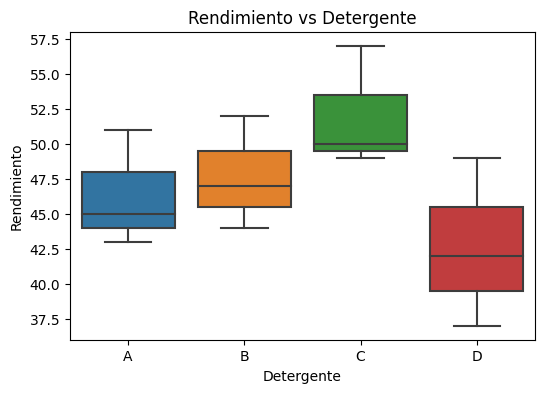

In [ ]:
# **2.5. BoxPlot para DBCA: V_Sanguineo vs S_Ferroso**
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.set_title('Rendimiento vs Detergente')
sns.boxplot(x="Detergente", y='Rendimiento',data=DBCA,ax=ax)


\# **2.6. BoxPlot para DBCA: Detergente vs Lavadoras**

<Axes: title={'center': 'Rendimiento vs Lavadora'}, xlabel='Lavadora', ylabel='Rendimiento'>

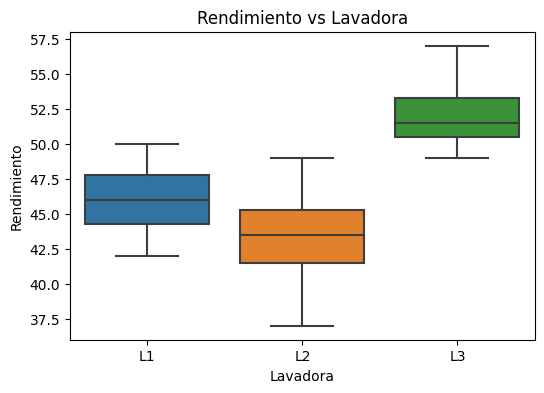

In [ ]:
# **2.6. BoxPlot para DBCA: V_Sanguineo vs Pesos**
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.set_title('Rendimiento vs Lavadora')
sns.boxplot(x="Lavadora", y='Rendimiento',data=DBCA,ax=ax)


# **2.7 Diagrama Bivariado no es sposible dado que no hay replicas**

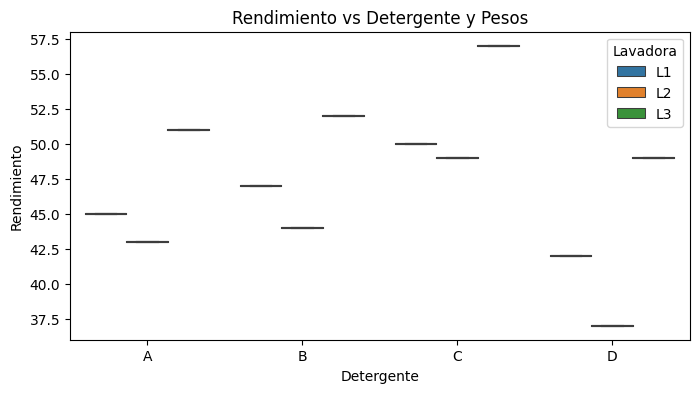

In [ ]:
# **2.7 Diagrama Bivariado no es sposible dado que no hay replicas**
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Rendimiento vs Detergente y Pesos')
sns.boxplot(x="Detergente", y="Rendimiento", hue='Lavadora', data=DBCA, ax=ax);

# **2.8 Análisis de Varianza Tipo I**

In [ ]:
# **2.8 Análisis de Varianza Tipo I**
modeloDBCA = ols("Rendimiento ~ Detergente + Lavadora", data = DBCA).fit()
anova_result2 = sm.stats.anova_lm(modeloDBCA, typ=2)
print (anova_result2)

                sum_sq   df          F    PR(>F)
Detergente  133.666667  3.0  34.127660  0.000363
Lavadora    170.166667  2.0  65.170213  0.000085
Residual      7.833333  6.0        NaN       NaN


In [ ]:
anova_result2.T

,Detergente,Lavadora,Residual
sum_sq,133.666667,170.166667,7.833333
df,3.000000,2.000000,6.000000
F,34.127660,65.170213,NaN
PR(>F),0.000363,0.000085,NaN


In [ ]:
print(modeloDBCA.summary())

                            OLS Regression Results                            
Dep. Variable:            Rendimiento   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     46.54
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           0.000101
Time:                        21:51:59   Log-Likelihood:                -14.468
No. Observations:                  12   AIC:                             40.94
Df Residuals:                       6   BIC:                             43.85
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          45.1667      0.808     

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# **2.9 Análisis de Varianza Tipo II**

In [ ]:
# **2.9 Análisis de Varianza Tipo II**
modeloDBCA2 = smf.ols("Rendimiento ~ Detergente + Lavadora", data = DBCA).fit()
print(modeloDBCA2.summary())

                            OLS Regression Results                            
Dep. Variable:            Rendimiento   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     46.54
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           0.000101
Time:                        21:51:59   Log-Likelihood:                -14.468
No. Observations:                  12   AIC:                             40.94
Df Residuals:                       6   BIC:                             43.85
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          45.1667      0.808     

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
anova_result3 = sm.stats.anova_lm(modeloDBCA2, typ=2)
anova_result3.T

,Detergente,Lavadora,Residual
sum_sq,133.666667,170.166667,7.833333
df,3.000000,2.000000,6.000000
F,34.127660,65.170213,NaN
PR(>F),0.000363,0.000085,NaN


# **2.10 Comparaciones Múltiples:S_Ferroso**

In [ ]:
from scipy.stats import tukey_hsd
Detergente_A = [45, 43, 51]
Detergente_B = [47, 44, 52]
Detergente_C = [50, 49, 57]
Detergente_D = [42, 37, 49]


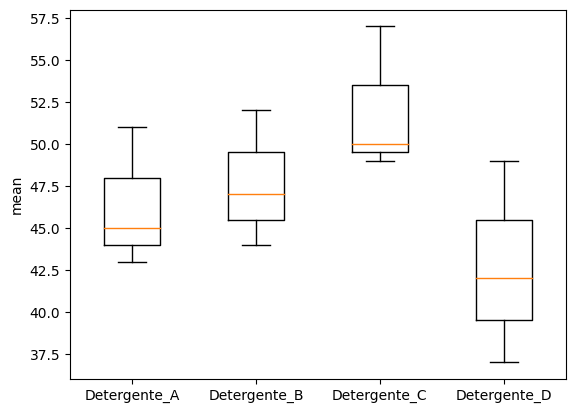

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.boxplot([Detergente_A, Detergente_B, Detergente_C, Detergente_D])
ax.set_xticklabels(["Detergente_A", "Detergente_B", "Detergente_C", 'Detergente_D'])
ax.set_ylabel("mean")
plt.show()

In [ ]:
res = tukey_hsd(Detergente_A, Detergente_B, Detergente_C, Detergente_D)
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -1.333     0.985   -13.667    11.000
 (0 - 2)     -5.667     0.495   -18.000     6.667
 (0 - 3)      3.667     0.779    -8.667    16.000
 (1 - 0)      1.333     0.985   -11.000    13.667
 (1 - 2)     -4.333     0.686   -16.667     8.000
 (1 - 3)      5.000     0.589    -7.334    17.334
 (2 - 0)      5.667     0.495    -6.667    18.000
 (2 - 1)      4.333     0.686    -8.000    16.667
 (2 - 3)      9.333     0.149    -3.000    21.667
 (3 - 0)     -3.667     0.779   -16.000     8.667
 (3 - 1)     -5.000     0.589   -17.334     7.334
 (3 - 2)     -9.333     0.149   -21.667     3.000



group1,group2,meandiff,p-adj,lower,upper,reject
A,B,1.3333,0.9847,-11.0002,13.6669,False
A,C,5.6667,0.495,-6.6669,18.0002,False
A,D,-3.6667,0.779,-16.0002,8.6669,False
B,C,4.3333,0.6855,-8.0002,16.6669,False
B,D,-5.0,0.5887,-17.3336,7.3336,False
C,D,-9.3333,0.1495,-21.6669,3.0002,False


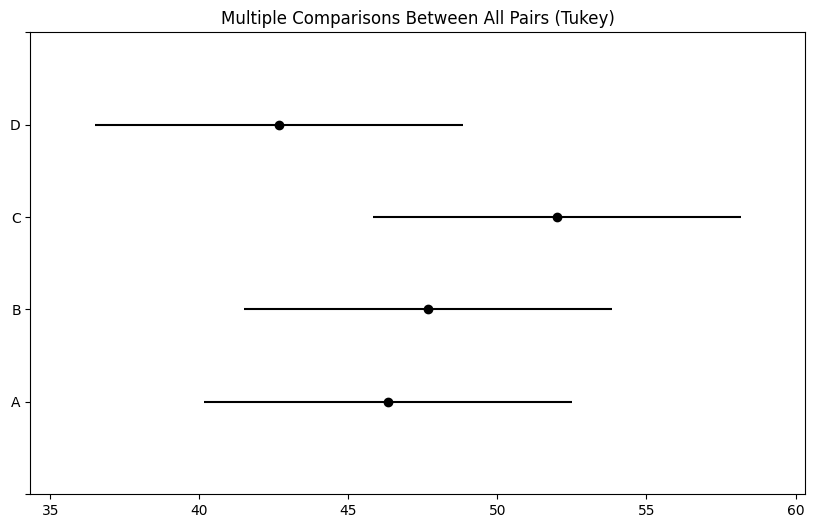

In [ ]:

# **2.10 Comparaciones Múltiples:S_Ferroso**
tukey = pairwise_tukeyhsd(endog=DBCA["Rendimiento"],     # Data
                          groups=DBCA["Detergente"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()


In [ ]:
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   1.3333 0.9847 -11.0002 13.6669  False
     A      C   5.6667  0.495  -6.6669 18.0002  False
     A      D  -3.6667  0.779 -16.0002  8.6669  False
     B      C   4.3333 0.6855  -8.0002 16.6669  False
     B      D     -5.0 0.5887 -17.3336  7.3336  False
     C      D  -9.3333 0.1495 -21.6669  3.0002  False
-----------------------------------------------------


In [ ]:
import statsmodels.stats.multicomp as multi

# Sample data: scores from students in three different classes

# Perform Tukey's Test
results2 = multi.pairwise_tukeyhsd(DBCA["Rendimiento"], DBCA["Detergente"])

# Print the results
print(results2)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   1.3333 0.9847 -11.0002 13.6669  False
     A      C   5.6667  0.495  -6.6669 18.0002  False
     A      D  -3.6667  0.779 -16.0002  8.6669  False
     B      C   4.3333 0.6855  -8.0002 16.6669  False
     B      D     -5.0 0.5887 -17.3336  7.3336  False
     C      D  -9.3333 0.1495 -21.6669  3.0002  False
-----------------------------------------------------


In [ ]:
import statsmodels.stats.multicomp as multi

# Sample data: scores from students in three different classes
scores = [90, 92, 91, 89, 95, 93, 91, 96, 94, 92, 87, 85, 88, 86, 87]
classes = ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C']

# Perform Tukey's Test
results = multi.pairwise_tukeyhsd(scores, classes)

# Print the results
print(results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B      1.8 0.3096 -1.3265  4.9265  False
     A      C     -4.8 0.0039 -7.9265 -1.6735   True
     B      C     -6.6 0.0003 -9.7265 -3.4735   True
----------------------------------------------------


# **2.11 Comparaciones Múltiples:Pesos**

group1,group2,meandiff,p-adj,lower,upper,reject
L1,L2,-2.75,0.6063,-10.5781,5.0781,False
L1,L3,6.25,0.1192,-1.5781,14.0781,False
L2,L3,9.0,0.0261,1.1719,16.8281,True


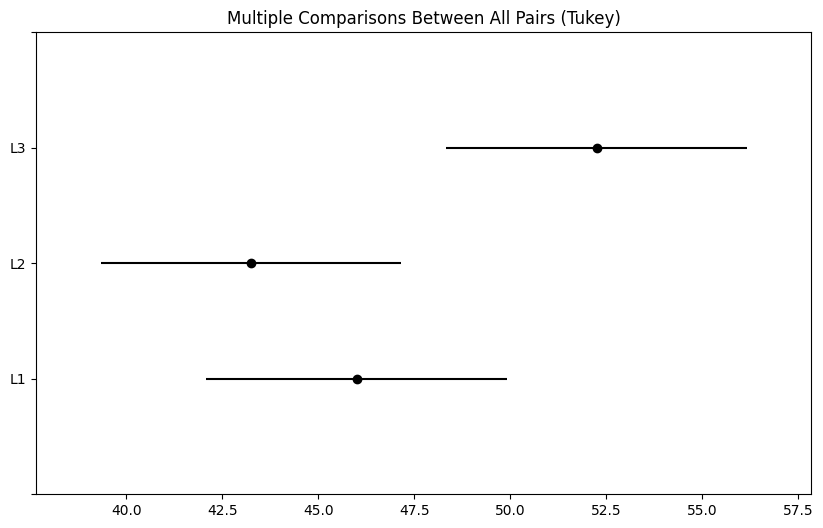

In [ ]:

# **2.11 Comparaciones Múltiples:Pesos**
tukey = pairwise_tukeyhsd(endog=DBCA["Rendimiento"],     # Data
                          groups=DBCA["Lavadora"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

# **2.12 Supuesto del Modelo: Normalidad Prueba de  Shapiro Wilks**

In [ ]:

# **3.12 Supuesto del Modelo: Normalidad Prueba de  Shapiro Wilks**
w, pvalue = stats.shapiro(modeloDBCA.resid)
print(w, pvalue)

0.9685076475143433 0.8945571184158325


# **2.13  Supuesto del Modelo: Normalidad: Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**

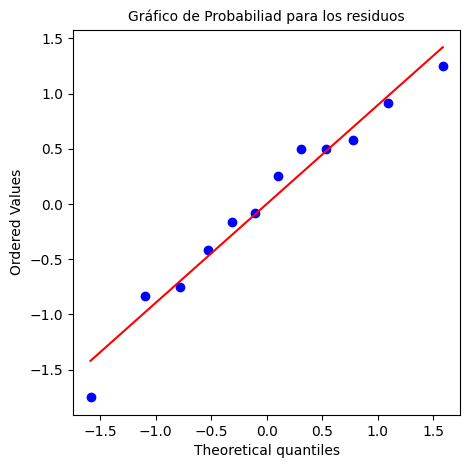

In [ ]:
# **2.13  Supuesto del Modelo: Normalidad: Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(modeloDBCA.resid, plot= plt, rvalue= False)
ax.set_title("Gráfico de Probabiliad para los residuos", fontsize= 10)
ax.set

plt.show()

# **2.14 Residuos del Modelo**

In [ ]:
# **2.14 Residuos del Modelo**
modeloDBCA.resid.describe()

count    1.200000e+01
mean    -1.598721e-14
std      8.438727e-01
min     -1.750000e+00
25%     -5.000000e-01
50%      8.333333e-02
75%      5.208333e-01
max      1.250000e+00
dtype: float64

# **2.15 Histograma de Residuos**

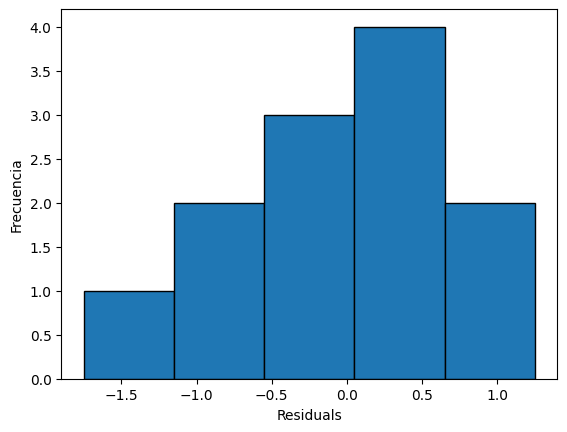

In [ ]:

# **2.15 Histograma de Residuos**
plt.hist(modeloDBCA.resid, bins='auto', histtype='bar', ec='k')

plt.xlabel("Residuals")
plt.ylabel('Frecuencia')
plt.show()


# **2.16 Histograma + curva normal teórica**

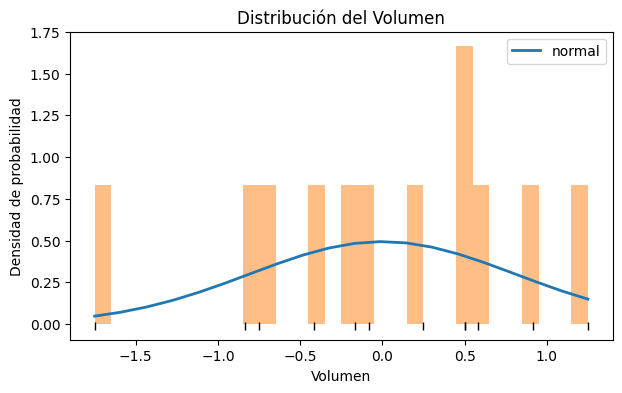

In [ ]:
# **2.16 Histograma + curva normal teórica**
# ==============================================================================
Volumen = modeloDBCA.resid
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(Volumen)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(Volumen), max(Volumen), num=20)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=Volumen, density=True, bins=30,  alpha=0.5)
ax.plot(Volumen, np.full_like(Volumen, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución del Volumen')
ax.set_xlabel('Volumen')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

# **2.17 Gráfico Q-Q**

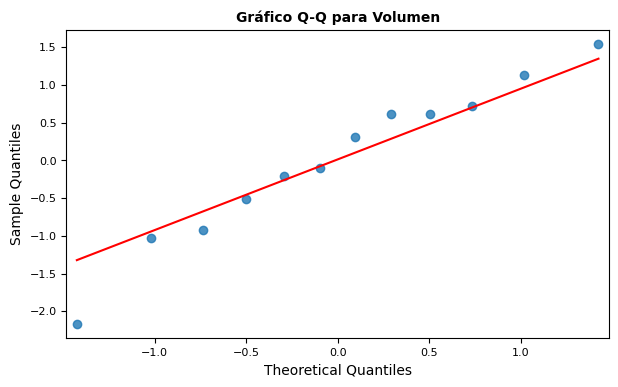

In [ ]:
# **2.17 Gráfico Q-Q**
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    Volumen,
    fit   = True,
    line  = 'q',
    alpha = 0.8,
    lw    = 5,
    ax    = ax
)
ax.set_title('Gráfico Q-Q para Volumen', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 8)

In [ ]:
# **2.10 Comparaciones Múltiples:S_Ferroso**
tukey = pairwise_tukeyhsd(endog=DBCA["Rendimiento"],     # Data
                          groups=DBCA["Detergente"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

In [ ]:
DBCA

,Lavadora,Detergente,Rendimiento
0,L1,A,45
1,L2,A,43
2,L3,A,51
3,L1,B,47
4,L2,B,44
5,L3,B,52
6,L1,C,50
7,L2,C,49
8,L3,C,57
9,L1,D,42


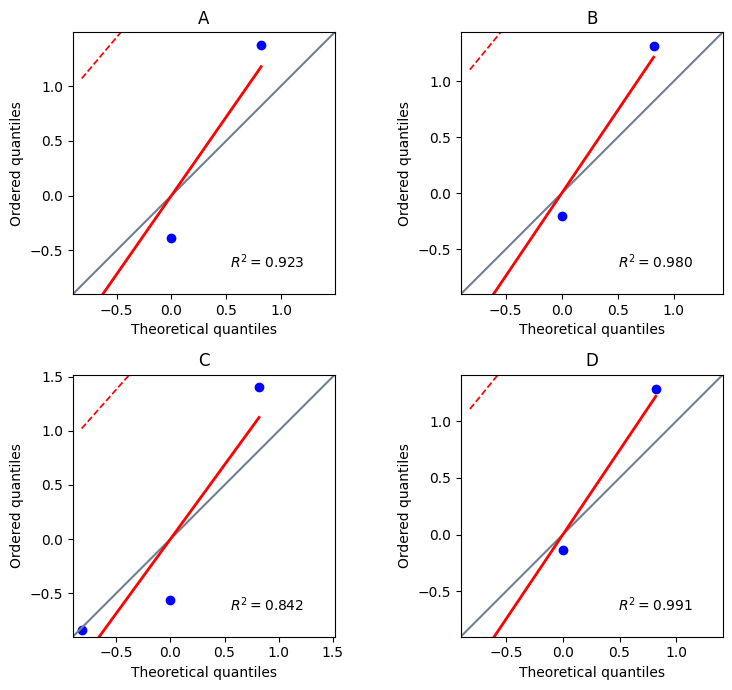

In [ ]:
# Gráficos qqplot
# ==============================================================================
#!pip install pingouin
import pingouin as pg
fig, axs = plt.subplots(2, 2, figsize=(8, 7))
pg.qqplot(DBCA.loc[DBCA.Detergente=='A', 'Rendimiento'], dist='norm', ax=axs[0,0])
axs[0,0].set_title('A')
pg.qqplot(DBCA.loc[DBCA.Detergente=='B', 'Rendimiento'], dist='norm', ax=axs[0,1])
axs[0,1].set_title('B')
pg.qqplot(DBCA.loc[DBCA.Detergente=='C', 'Rendimiento'], dist='norm', ax=axs[1,0])
axs[1,0].set_title('C')
pg.qqplot(DBCA.loc[DBCA.Detergente=='D', 'Rendimiento'], dist='norm', ax=axs[1,1])
axs[1,1].set_title('D')
plt.tight_layout()

In [ ]:
# Test de normalidad Shapiro-Wilk
# ==============================================================================
pg.normality(data=DBCA, dv='Rendimiento', group='Lavadora')

,W,pval,normal
Lavadora,,,
L1,0.999944,0.999856,True
L2,0.973019,0.860078,True
L3,0.923338,0.555820,True


In [ ]:
dic_DBCA2 ={'Detergente': Detergente,'Lavadora': Lavadora, 'Rendimiento':Rendimiento}
DBCA2 = pd.DataFrame(dic_DBCA2)
DBCA2

,Detergente,Lavadora,Rendimiento
0,A,L1,45
1,A,L2,43
2,A,L3,51
3,B,L1,47
4,B,L2,44
5,B,L3,52
6,C,L1,50
7,C,L2,49
8,C,L3,57
9,D,L1,42


In [ ]:
# Test de normalidad Shapiro-Wilk
# ==============================================================================
pg.normality(data=DBCA2, dv='Rendimiento', group='Detergente')

/usr/local/lib/python3.10/dist-packages/pingouin/distribution.py:242: UserWarning: Group A has less than 4 valid samples. Returning NaN.
  warnings.warn(f"Group {idx} has less than 4 valid samples. Returning NaN.")
/usr/local/lib/python3.10/dist-packages/pingouin/distribution.py:242: UserWarning: Group B has less than 4 valid samples. Returning NaN.
  warnings.warn(f"Group {idx} has less than 4 valid samples. Returning NaN.")
/usr/local/lib/python3.10/dist-packages/pingouin/distribution.py:242: UserWarning: Group C has less than 4 valid samples. Returning NaN.
  warnings.warn(f"Group {idx} has less than 4 valid samples. Returning NaN.")
/usr/local/lib/python3.10/dist-packages/pingouin/distribution.py:242: UserWarning: Group D has less than 4 valid samples. Returning NaN.
  warnings.warn(f"Group {idx} has less than 4 valid samples. Returning NaN.")


,W,pval,normal
Detergente,,,
A,NaN,NaN,False
B,NaN,NaN,False
C,NaN,NaN,False
D,NaN,NaN,False


In [ ]:
# Test de homocedasticidad
# ==============================================================================
pg.homoscedasticity(data=DBCA, dv='Rendimiento', group='Detergente', method='levene')

,W,pval,equal_var
levene,0.124031,0.943276,True


In [ ]:
# Test ANOVA de dos vías (Two-way ANOVA)
# ==============================================================================
pg.rm_anova(
    data       = DBCA,
    dv         = 'Rendimiento',
    within     = 'Detergente',
    subject    = 'Lavadora',
    detailed   = True,
    correction = 'auto'
).round(4)

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,Detergente,133.6667,3,44.5556,34.1277,0.0004,0.4289,0.4509
1,Error,7.8333,6,1.3056,NaN,NaN,NaN,NaN


In [ ]:
# **2.8 Análisis de Varianza Tipo I**
modeloDBCA = ols("Rendimiento ~ Detergente + Lavadora", data = DBCA).fit()
anova_result2 = sm.stats.anova_lm(modeloDBCA, typ=2)
print (anova_result2)

                sum_sq   df          F    PR(>F)
Detergente  133.666667  3.0  34.127660  0.000363
Lavadora    170.166667  2.0  65.170213  0.000085
Residual      7.833333  6.0        NaN       NaN


In [ ]:
# Post-hoc pairwise t-test
# ==============================================================================
pg.pairwise_ttests(
    dv      = 'Rendimiento',
    within  = 'Detergente',
    subject = 'Lavadora',
    padjust = 'holm',
    data    = DBCA)

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)
/usr/local/lib/python3.10/dist-packa

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Detergente,A,B,True,True,-4.000000,2.0,two-sided,0.057191,0.148241,holm,2.358,-0.259982
1,Detergente,A,C,True,True,-17.000000,2.0,two-sided,0.003442,0.020654,holm,11.253,-1.063604
2,Detergente,A,D,True,True,3.050851,2.0,two-sided,0.092735,0.148241,holm,1.75,0.566271
3,Detergente,B,C,True,True,-6.500000,2.0,two-sided,0.022860,0.099020,holm,4.033,-0.824774
4,Detergente,B,D,True,True,4.330127,2.0,two-sided,0.049414,0.148241,holm,2.575,0.779484
5,Detergente,C,D,True,True,7.000000,2.0,two-sided,0.019804,0.099020,holm,4.373,1.419542
